##### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Portfolio Optimization

This [IPython notebook](http://ipython.org/notebook.html) demonstrates the formulation and solution of portfolio optimization problems.

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# data wrangling libraries
import pandas_datareader.data as web
import pandas as pd
import datetime

%matplotlib inline

## Load Price Data

Here we create several groups of possible trading symbols, and select one for study.

In [23]:
# Companies of the Dow Jones Industrial Average
djia = ['mmm','axp','aapl','ba','cat','cvx','csco','ko','dis','dwdp',
        'xom','ge','gs','hd','ibm','intc','jnj','jpm','mcd','mrk',
        'msft','nke','pfe','pg','trv','utx','unh','vz','v','wmt']

# Representative ETF's and ETN's from the energy sector
energy = ['oil','uso','uga','uhn','kol','ung']

# Standard indices
indices = ['^dji','^gspc']

# pick one of these groups for study
syms = djia[0:6]
print(syms)

['mmm', 'axp', 'aapl', 'ba', 'cat', 'cvx']


Price data is retrieved using the Pandas DataReader function. The first price data set consists of historical data that will be used to design investment portfolios. The second set will be used for simulation and evaluation of resulting portfolios. The use of 'out-of-sample' data for evaluation is standard practice in these types of applications.

In [24]:
t2 = datetime.datetime.now()
t1 = t2 - datetime.timedelta(365)
t0 = t1 - datetime.timedelta(2*365)

Prices = pd.DataFrame()
PricesSim = pd.DataFrame()
for s in syms:
    print(s,end='')
    k = 1
    while k < 4:
        try:
            print(' attempt',k,end='')
            Prices[s] = web.DataReader(s,'yahoo',t0,t1)['Adj Close']
            PricesSim[s] = web.DataReader(s,'yahoo',t1,t2)['Adj Close']
            print(' ok')
            k = 4
        except:
            k += 1

mmm attempt 1 ok
axp attempt 1 ok
aapl attempt 1 ok
ba attempt 1 ok
cat attempt 1 attempt 2 ok
cvx attempt 1 attempt 2 ok


## Plot Price and Returns Data

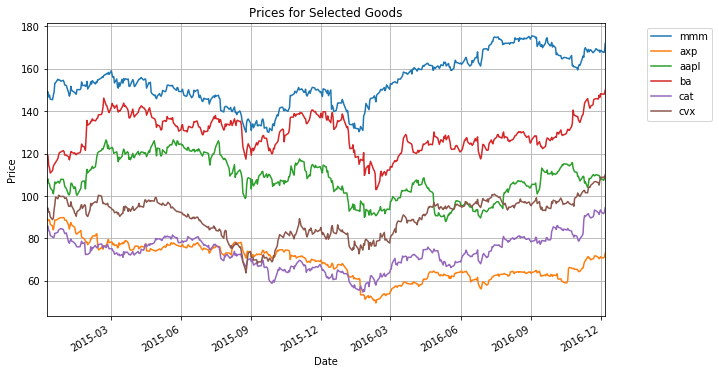

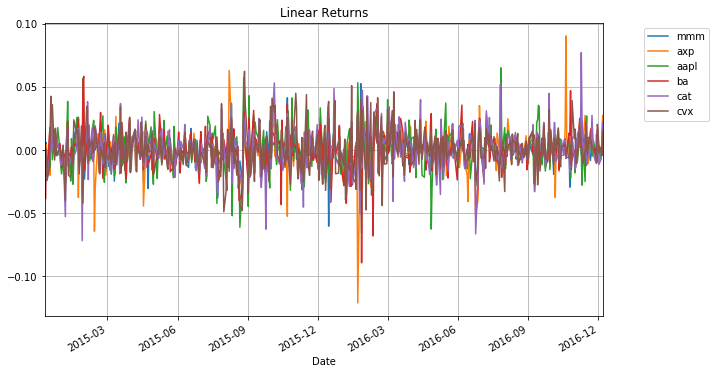

In [25]:
Prices.plot(figsize=(10,6))

plt.title('Prices for Selected Goods')
plt.ylabel('Price')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0))
plt.grid()

Returns = Prices.diff()/Prices.shift(1)
Returns.dropna(inplace=True)

Returns.plot(figsize=(10,6))
plt.title('Linear Returns')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0))
plt.grid()

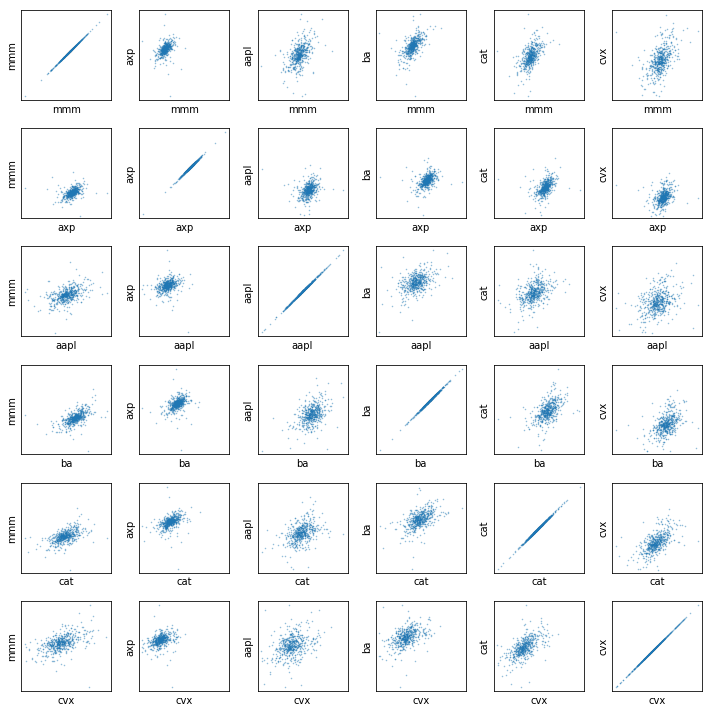

In [48]:
syms = Prices.columns
N = len(syms)
plt.figure(figsize=(10,10))
for i in range(0,N):
    for j in range(0,N):
        plt.subplot(N,N,i*N+j+1)
        gca = plt.plot(Returns[syms[i]],Returns[syms[j]],'.',ms=1,alpha=0.5)
        gca[0].axes.get_xaxis().set_ticks([])
        gca[0].axes.get_yaxis().set_ticks([])
        plt.xlabel(syms[i])
        plt.ylabel(syms[j])
        plt.axis('square')
plt.tight_layout()

## Linear and Log Returns

In [27]:
rlin = Returns.mean()
stdev = Returns.std()

rlog = np.log(Prices).diff().mean()

In [28]:
print( "Annualized Returns and Standard Deviation\n")
print( "Symbol     r_lin       r_log    r_lin-s^2/2    stdev")
for s in Returns.columns.values.tolist():
    print("{0:5s}".format(s),end='')
    print("  {0:9.5f}".format(252.0*rlin[s]),end='')
    print("   {0:9.5f}".format(252.0*rlog[s]),end='')
    print("   {0:9.5f}".format(252.0*(rlin[s] - 0.5*stdev[s]**2)),end='')
    print("   {0:9.5f}".format(np.sqrt(252.0)*stdev[s]))

Annualized Returns and Standard Deviation

Symbol     r_lin       r_log    r_lin-s^2/2    stdev
mmm      0.08543     0.07111     0.07111     0.16924
axp     -0.07136    -0.09880    -0.09853     0.23309
aapl     0.04545     0.01332     0.01328     0.25363
ba       0.14032     0.11325     0.11339     0.23205
cat      0.08387     0.04942     0.04939     0.26262
cvx      0.11233     0.07850     0.07835     0.26068


## Covariance and Correlation Matrices

In [29]:
sigma = Returns.cov()
rho = sigma.copy()

for i in Returns.columns.values.tolist():
    for j in Returns.columns.values.tolist():
        rho[i][j] = sigma[i][j]/stdev[i]/stdev[j]
        
pd.options.display.float_format = '{:,.6f}'.format

print( "\nCovariance Matrix\n")
print( sigma)

print( "\nCorrelation Coefficients\n")
print( rho)


Covariance Matrix

          mmm      axp     aapl       ba      cat      cvx
mmm  0.000114 0.000057 0.000077 0.000086 0.000093 0.000087
axp  0.000057 0.000216 0.000057 0.000080 0.000097 0.000070
aapl 0.000077 0.000057 0.000255 0.000104 0.000107 0.000090
ba   0.000086 0.000080 0.000104 0.000214 0.000125 0.000102
cat  0.000093 0.000097 0.000107 0.000125 0.000274 0.000160
cvx  0.000087 0.000070 0.000090 0.000102 0.000160 0.000270

Correlation Coefficients

          mmm      axp     aapl       ba      cat      cvx
mmm  1.000000 0.366291 0.452249 0.550745 0.526953 0.496915
axp  0.366291 1.000000 0.242530 0.374563 0.400457 0.289987
aapl 0.452249 0.242530 1.000000 0.446136 0.405623 0.344074
ba   0.550745 0.374563 0.446136 1.000000 0.515456 0.423412
cat  0.526953 0.400457 0.405623 0.515456 1.000000 0.590064
cvx  0.496915 0.289987 0.344074 0.423412 0.590064 1.000000


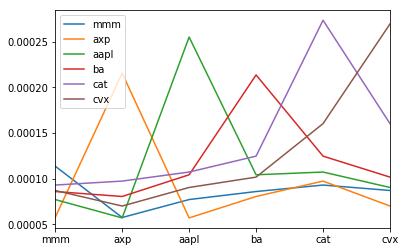

In [30]:
sigma.plot()

# Return versus Volatility

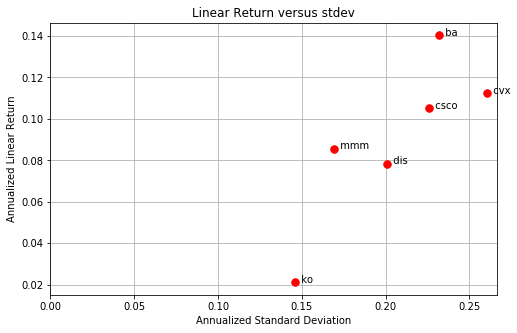

In [23]:
plt.figure(figsize=(8,5))
for s in Returns.columns.values.tolist():
    plt.plot(np.sqrt(252.0)*stdev[s],252*rlin[s],'r.',ms=15)
    plt.text(np.sqrt(252.0)*stdev[s],252*rlin[s],"  {0:5<s}".format(s))

plt.xlim(0.0,plt.xlim()[1])
plt.title('Linear Return versus stdev')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Linear Return')
plt.grid()

## Creating Portfolios

A portfolio is created by allocating current wealth among a collection of assets. Let $w_n$ be the fraction of wealth allocated to the $n^{th}$ asset from a set of $N$ assets. Then

$$\sum_{n=1}^N w_n = 1$$

It may be possible to borrow assets, in which case the corresponding $w_n$ is negative. A _long only_ portfolio is one such that all of weights $w_n$ are greater than or equal to zero.

### Mean Return and Variance of a Portfolio

Denoting the total value of the portfolio as V, the value invested in asset $n$ is $w_nV$. At a price $S_n$, the number of units of the asset is $\frac{w_nV}{S_n}$ for a total value

$$ V = \sum_{n=1}^N \frac{w_n V}{S_n}S_n $$

at the start of the investment period. The value of the investment at the end of the period, $V'$, is given by

$$ V' = \sum_{n=1}^N \frac{w_n V}{S_n}(1+r^{lin}_n)S_n $$

Taking differences we find

$$ V' - V = \sum_{n=1}^N \frac{w_n V}{S_n}r^{lin}_nS_n $$

which, after division, yields the return on the portfolio

$$ r^{lin}_p = \frac{V'-V}{V} = \sum_{n=1}^N w_nr^{lin}_n $$

Taking expectations, the mean return of the portfolio

$$\boxed{\bar{r}^{lin}_{p} = \sum_{n=1}^N w_n \bar{r}^{lin}_n}$$

Variance of portfolio return

$$\boxed{\sigma_{p}^2 = \sum_{m=1}^N\sum_{n=1}^N w_m w_n \sigma_{mn}}$$

## Examples of Portfolios with Two Assets

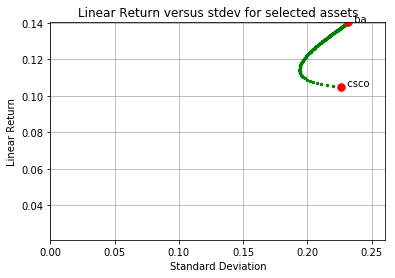

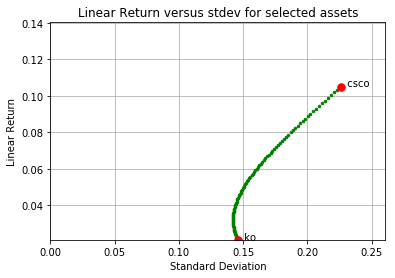

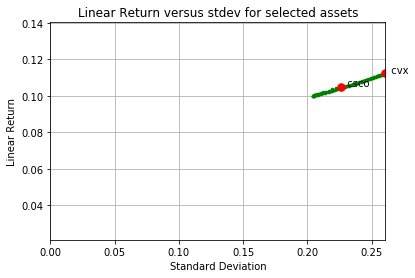

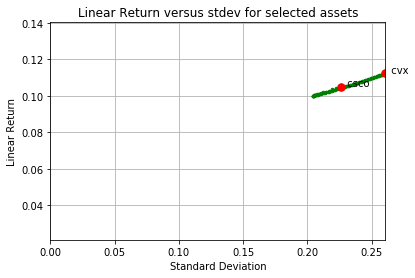

In [25]:
N_examples = 4

for i in range(0,N_examples):
    a,b = random.sample(Prices.columns.values.tolist(),2)

    plt.figure()
    for w in np.linspace(0.0,1.0,100):
        V = w*Prices[a] + (1-w)*Prices[b]
        returnsV = (V.diff()/V.shift(1))
        rV = returnsV.mean()
        sV = returnsV.std()
        plt.plot(np.sqrt(252.0)*sV,252.0*rV,'g.',ms=5)
            
    for s in (a,b):
        plt.plot(np.sqrt(252.0)*stdev[s],252*rlin[s],'r.',ms=15)
        plt.text(np.sqrt(252.0)*stdev[s],252*rlin[s],"  {0:5<s}".format(s))

    plt.xlim(0.0,np.sqrt(252.0)*stdev.max())
    plt.ylim(252.0*rlin.min(),252.0*rlin.max())

    plt.title('Linear Return versus stdev for selected assets')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Linear Return')
    plt.grid()


## Minimum Risk Portfolio

The minimum variance portfolio is found as a solution to 
$$\min_{w_1, w_2, \ldots, w_N} \sum_{m=1}^N\sum_{n=1}^N w_m w_n\sigma_{mn}$$
subject to 
$$\sum_{n=1}^N w_n = 1$$

### Pyomo Model and Solution

In [45]:
from pyomo.environ import *

N = len(Returns.columns.values.tolist())

m = ConcreteModel()
m.w = Var(range(0,N),domain=NonNegativeReals)

s = np.array(sigma)

m.OBJ = Objective(expr = sum(m.w[i]*s[i][j]*m.w[j] for i in range(0,N) for j in range(0,N))
                  ,sense=minimize)

m.cons = ConstraintList()
for i in range(0,N):
    m.cons.add(m.w[i] <=0.3)
m.cons.add(sum(m.w[i] for i in range(0,N)) == 1)

SolverFactory('ipopt').solve(m)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 7, 'Number of variables': 6, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.12.8\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.02784109115600586}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

Show weights for individual components of the portfolio

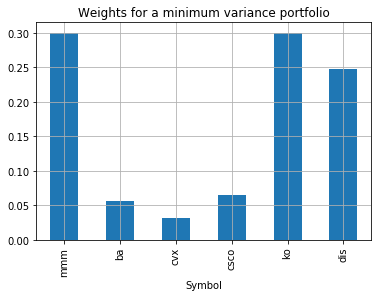

In [46]:
wval = pd.Series([m.w[i]() for i in range(0,N)],Prices.columns)
wval.plot(kind='bar')

plt.xlabel('Symbol')
plt.title('Weights for a minimum variance portfolio')
plt.grid()

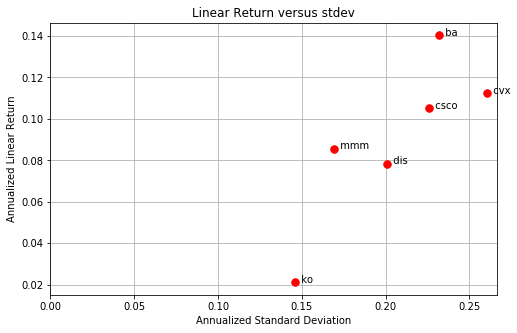

In [47]:
plt.figure(figsize=(8,5))
for s in Returns.columns.values.tolist():
    plt.plot(np.sqrt(252.0)*stdev[s],252*rlin[s],'r.',ms=15)
    plt.text(np.sqrt(252.0)*stdev[s],252*rlin[s],"  {0:5<s}".format(s))

plt.xlim(0.0,plt.xlim()[1])
plt.title('Linear Return versus stdev')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Linear Return')
plt.grid()

### Out-of-Sample Simulation

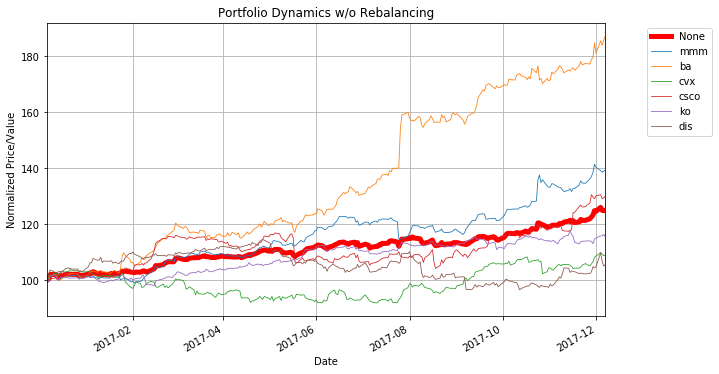

In [48]:
N = len(PricesSim.columns.values.tolist())

V = pd.Series(0,index=PricesSim.index)
for s in PricesSim.columns.values.tolist():
    V += (100.0*float(wval[s])/PricesSim[s][0])*PricesSim[s]
    
V.plot(lw=5,figsize=(10,6),color='red')
for s in PricesSim.columns.values.tolist():
    S = pd.Series(100.0*PricesSim[s]/PricesSim[s][0])
    S.plot(lw=0.8)

plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0))
plt.title('Portfolio Dynamics w/o Rebalancing')
plt.ylabel('Normalized Price/Value')
plt.grid()

Text(0.0708892,0.224943,'   Min. Var. Portfolio')

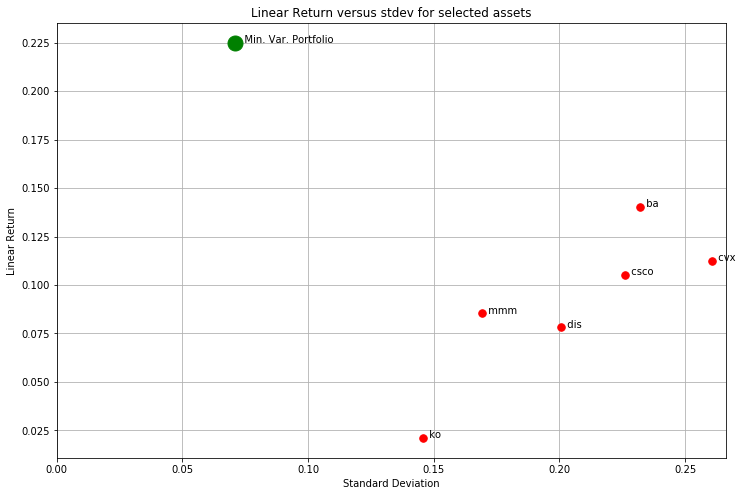

In [49]:
plt.figure(figsize=(12,8))
for s in Returns.columns.values.tolist():
    plt.plot(np.sqrt(252.0)*stdev[s],252*rlin[s],'r.',ms=15)
    plt.text(np.sqrt(252.0)*stdev[s],252*rlin[s],"  {0:5<s}".format(s))

plt.xlim(0.0,plt.xlim()[1])
plt.title('Linear Return versus stdev for selected assets')
plt.xlabel('Standard Deviation')
plt.ylabel('Linear Return')
plt.grid()

ReturnsV = (V.diff()/V.shift(1))
rlinMinVar = ReturnsV.mean()
stdevMinVar = ReturnsV.std()
plt.plot(np.sqrt(252.0)*stdevMinVar,252.0*rlinMinVar,'g.',ms=30)
plt.text(np.sqrt(252.0)*stdevMinVar,252.0*rlinMinVar,'   Min. Var. Portfolio')

## Markowitz Portfolio

The minimum variance portfolio does a good job of handling volatility, but at the expense of relatively low return. The Markowitz portfolio adds an additional constraint to specify mean portfolio return. 
$$\min_{w_1, w_2, \ldots, w_N} \sum_{m=1}^N\sum_{n=1}^N w_m w_n\sigma_{mn}$$
subject to 
$$\sum_{n=1}^N w_n = 1$$
and
$$\sum_{n=1}^N w_n \bar{r}^{lin}_n = \bar{r}^{lin}_p$$
By programming the solution of the optimization problem as a function of $\bar{r}_p$, it is possible to create a risk-return tradeoff curve.

In [51]:
# cvxpy problem description
w = cvx.Variable(N)
r = cvx.Parameter()

risk = cvx.quad_form(w, np.array(sigma))
prob = cvx.Problem(cvx.Minimize(risk), 
               [cvx.sum_entries(w) == 1, 
                np.array(rlin).T*w == r,
               w >= 0])

# lists to store results of parameter scans
r_data = []
stdev_data = []
w_data = []

# scan solution as function of portfolio return
for rp in np.linspace(rlin.min(),3.0*rlin.max(),100):
    r.value = rp
    s = prob.solve()
    if prob.status == "optimal":
        r_data.append(rp)
        stdev_data.append(np.sqrt(prob.solve()))
        w_data.append([u[0,0] for u in w.value])

plt.figure(figsize=(8,10))
plt.subplot(211)

# plot tradeoff curve
plt.plot(np.sqrt(252.0)*np.array(stdev_data), 252.0*np.array(r_data), lw=3)
for s in syms:
    plt.plot(np.sqrt(252.0)*stdev[s],252.0*rlin[s],'r.',ms=15)
    plt.text(np.sqrt(252.0)*stdev[s],252.0*rlin[s],"  {0:5<s}".format(s))

plt.plot(np.sqrt(252.0)*stdevMinVar,252.0*rlinMinVar,'g.',ms=30)
plt.text(np.sqrt(252.0)*stdevMinVar,252.0*rlinMinVar,'   Min. Var. Portfolio')

plt.xlim(0.0,plt.xlim()[1])
plt.title('Linear Return versus stdev for Markowitz Portfolio')
plt.xlabel('Standard Deviation')
plt.ylabel('Linear Return')
plt.grid()

NameError: name 'cvx' is not defined

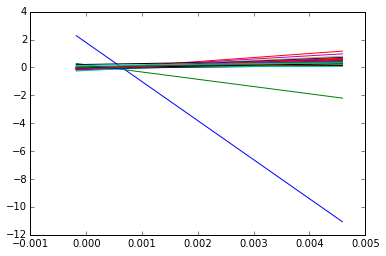

In [82]:
# plot portfolio weights
w_data = np.array(w_data)
for i in range(N):
    plt.plot(r_data,w_data.T[i])

### Out of Sample Simulation

In [46]:
end = datetime.datetime.now()
start = end - datetime.timedelta(3*365)

PricesSim = pd.DataFrame()
for s in syms:
    PricesSim[s] = web.DataReader(s,'yahoo',start,end)['Adj Close']

In [48]:
V = pd.Series((100.0*float(w.value[0])/PricesSim.ix[0,0])*PricesSim.ix[:,0])
for n in range(1,N):
    V += (100.0*float(w.value[n])/PricesSim.ix[0,n])*PricesSim.ix[:,n]

V.plot(lw=5,figsize=(10,6))
plt.hold(True)
for s in PricesSim.columns.values.tolist():
    S = pd.Series(100.0*PricesSim[s]/PricesSim[s][0])
    S.plot(lw=0.5)
V.plot(lw=5,color='red')

plt.title('Portfolio Dynamics w/o Rebalancing')
plt.ylabel('Normalized Price/Value')
plt.grid()

TypeError: 'NoneType' object has no attribute '__getitem__'

## Risk-Free Asset

The minimum variance portfolio does a good job of handling volatility, but at the expense of relatively low return. The Markowitz portfolio adds an additional constraint to specify mean portfolio return. 
$$\min_{w_1, w_2, \ldots, w_N} \sum_{m=1}^N\sum_{n=1}^N w_m w_n\sigma_{mn}$$
subject to 
$$\sum_{n=1}^N w_n = 1 - w_f$$
and
$$\sum_{n=1}^N w_n \bar{r}^{lin}_n + w_f r_f = \bar{r}^{lin}_p$$
By programming the solution of the optimization problem as a function of $\bar{r}_p$, it is possible to create a risk-return tradeoff curve.

In [54]:
# cvxpy problem description

m = ConcreteModel()

m.w = Var(range(0,N), domain = Reals)
wf

0.319026600441
0.01
0.110681042214


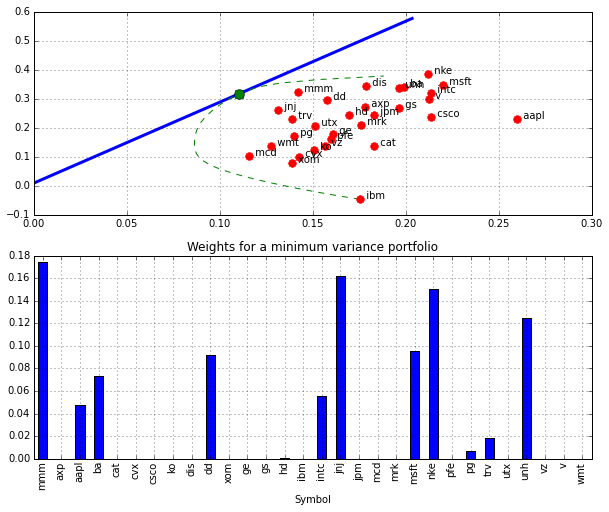

In [107]:
w = cvx.Variable(N)
wf = cvx.Variable(1)
r = cvx.Parameter()

rf = 0.01/252.0

risk = cvx.quad_form(w, np.array(sigma))
prob = cvx.Problem(cvx.Minimize(risk), 
               [cvx.sum_entries(w) == 1 - wf, 
                np.array(rlin).T*w + wf*rf == r,
               w >= 0])

# lists to store results of parameter scans
r_data_rf = []
stdev_data_rf = []
w_data_rf = []

# scan solution as function of portfolio return
for rp in np.linspace(np.min(rf,rlin.min()),1.5*rlin.max(),100):
    r.value = rp
    s = prob.solve()
    if prob.status == "optimal":
        r_data_rf.append(rp)
        stdev_data_rf.append(np.sqrt(prob.solve()))
        w_data_rf.append([u[0,0] for u in w.value])

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(np.sqrt(252.0)*np.array(stdev_data_rf), 252.0*np.array(r_data_rf),lw=3)
plt.plot(np.sqrt(252.0)*np.array(stdev_data), 252.0*np.array(r_data),'g--')
for s in syms:
    plt.plot(np.sqrt(252.0)*stdev[s],252.0*rlin[s],'r.',ms=15)
    plt.text(np.sqrt(252.0)*stdev[s],252.0*rlin[s],"  {0:5<s}".format(s))
    
# find max Sharpe ratio
k = np.argmax(np.divide(np.array(r_data)-rf,np.array(stdev_data)))
smax = stdev_data[k]
rmax = r_data[k]
plt.plot(np.sqrt(252.0)*smax,252.0*rmax,'o',ms=10)
print 252.0*rmax
print 252.0*rf
print np.sqrt(252.0)*smax

plt.xlim(0.0,plt.xlim()[1])
plt.grid()

plt.subplot(212)

wval = pd.Series(w_data[k],syms)
wval.plot(kind='bar')

plt.xlabel('Symbol')
plt.title('Weights for a minimum variance portfolio')
plt.grid()

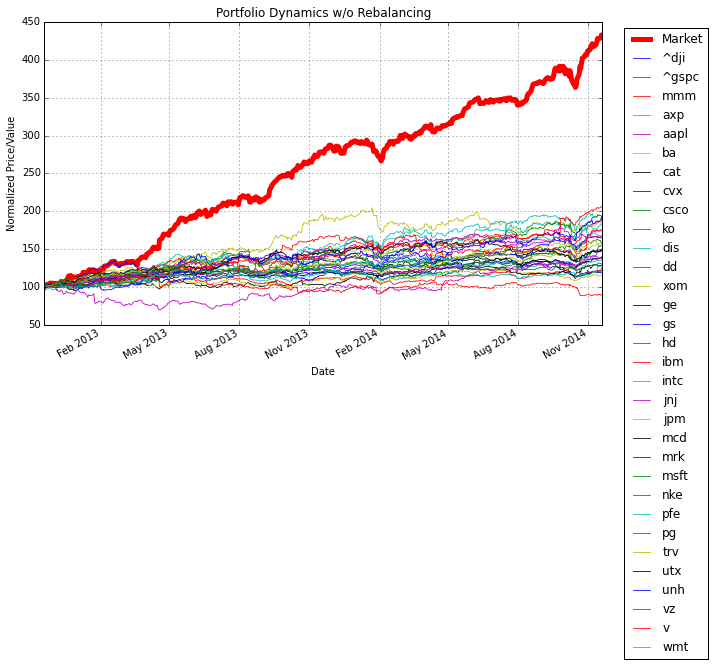

In [85]:
N = len(Prices.columns.values.tolist())

# create price history of the portfolio
V = pd.Series(0,index=Prices.index,name='Market')
for s in Prices.columns.values.tolist():
    V += (100.0*float(wval[s])/Prices[s][0])*Prices[s]
    
V.plot(lw=5,figsize=(10,6),color='red')

# plot components
plt.hold(True)
for s in Prices.columns.values.tolist():
    S = pd.Series(100.0*Prices[s]/Prices[s][0])
    S.plot(lw=0.8)

plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0))
plt.title('Portfolio Dynamics w/o Rebalancing')
plt.ylabel('Normalized Price/Value')
plt.grid()

In [86]:
P['Market'] = V
Sigma = P.cov()
Sigma.ix[:,'Market']/Sigma.ix['Market','Market']

^dji     12.528858
^gspc     1.934181
mmm       0.197222
axp       0.120742
aapl      0.133096
ba        0.208771
cat       0.072742
cvx       0.051164
csco      0.016654
ko        0.016795
dis       0.136692
dd        0.086136
xom       0.053090
ge        0.020513
gs        0.154648
hd        0.086056
ibm      -0.047416
intc      0.046451
jnj       0.122271
jpm       0.054673
mcd       0.023521
mrk       0.067638
msft      0.068685
nke       0.121157
pfe       0.016580
pg        0.048426
trv       0.075682
utx       0.104676
unh       0.123136
vz        0.022144
v         0.065840
wmt       0.029284
Market    1.000000
Name: Market, dtype: float64

## Maximum Log Return (to be developed).

infeasible


IndexError: too many indices for array

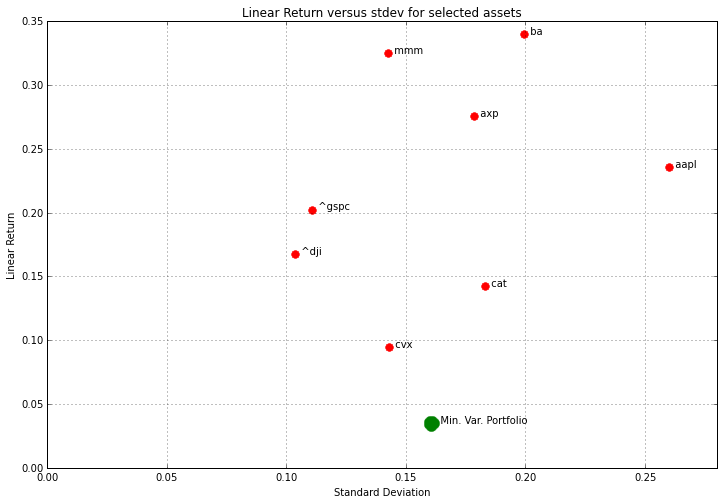

In [353]:
import cvxpy as cvx

N = len(syms)

w = cvx.Variable(N)
risk = cvx.quad_form(w, np.array(sigma))
prob = cvx.Problem(cvx.Maximize(np.array(rlin).T*w-0.5*risk), 
               [cvx.sum_entries(w) == 1,
                risk <= 0.0005/np.sqrt(252.0),
                w>=0])

prob.solve()
print prob.status

plt.figure(figsize=(12,8))
for s in Returns.columns.values.tolist():
    plt.plot(np.sqrt(252.0)*stdev[s],252*rlin[s],'r.',ms=15)
    plt.text(np.sqrt(252.0)*stdev[s],252*rlin[s],"  {0:5<s}".format(s))

plt.xlim(0.0,plt.xlim()[1])
plt.title('Linear Return versus stdev for selected assets')
plt.xlabel('Standard Deviation')
plt.ylabel('Linear Return')
plt.grid()
plt.hold(True)

plt.plot(np.sqrt(252.0)*stdevMinVar,252.0*rlinMinVar,'g.',ms=30)
plt.text(np.sqrt(252.0)*stdevMinVar,252.0*rlinMinVar,'   Min. Var. Portfolio')

wval = np.array(w.value)[:,0].T
rlog = np.dot(np.array(rlin).T,wval)
stdevlog = np.sqrt(np.dot(np.dot(wval,np.array(sigma)),wval))

plt.plot(np.sqrt(252.0)*stdevlog,252.0*rlog,'g.',ms=30)
plt.text(np.sqrt(252.0)*stdevlog,252.0*rlog,'  Max. Return Portfolio')


## Exercises

1. Modify the minimum variance portfolio to be 'long-only', and add a diversification constraints that no more than 20% of the portfolio can be invested in any single asset.  How much does this change the annualized return?  the annualized standard deviation?

2. Modify the Markowitz portfolio to allow long-only positions and a diversification constraint that no more than 20% of the portfolio can be invested in any single asset. What conclusion to you draw?